# Réalisé par:
***-Oussama Nor***

***-Hiba Nahri***

***-Ibtissame Meghraoui***

# 1.Convolution de deux signaux

# -Méthode 1.

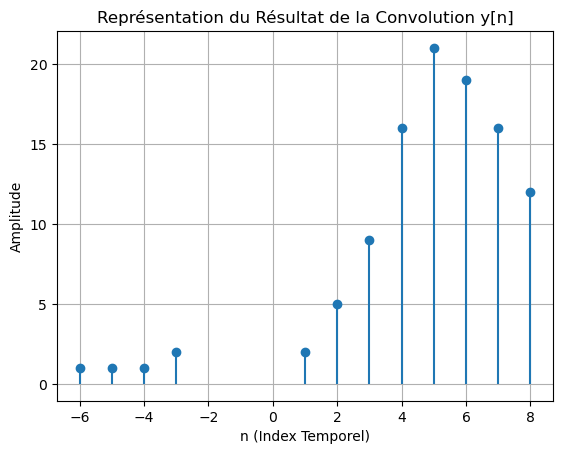

y[n] (Résultat de x[n] * h[n] sans valeurs nulles): [ 1  1  1  2  2  5  9 16 21 19 16 12]
Positions des deltas dans y[n]: [-6 -5 -4 -3  1  2  3  4  5  6  7  8]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Définir la fonction échelon unité
def unit_step(n):
    return np.where(n >= 0, 1, 0)

# Définir la fonction delta (impulsion discrète)
def delta(n):
    return np.where(n == 0, 1, 0)

# Fonction pour trouver les positions des impulsions delta
def find_delta_positions(signal):
    return np.where(signal != 0)[0]

# Question 
n = np.arange(-10, 10)  # Plage pour n
x = (delta(n + 5) + 2 * delta(n - 2) + 3 * delta(n - 3) +  4 * delta(n - 4) + 5 * delta(n - 5) + 6 * delta(n - 6))  # x[n]
h = delta(n + 1) + delta(n) + delta(n - 1) + 2 * delta(n - 2)  # h[n]

y = np.convolve(x, h, mode='full')  # Convolution
n_y = np.arange(2 * n[0], 2 * n[-1] + 1)  # Indices temporels pour y

# Supprimer les valeurs nulles dans y[n]
y_non_zero = y[y != 0]
delta_positions = n_y[find_delta_positions(y)]  # Positions des valeurs non nulles
amplitudes = y_non_zero  # Amplitudes sans les zéros

# Affichage graphique du résultat
plt.stem(delta_positions, amplitudes, basefmt=" ")
plt.title("Représentation du Résultat de la Convolution y[n]")
plt.xlabel("n (Index Temporel)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Afficher les résultats sans valeurs nulles
print("y[n] (Résultat de x[n] * h[n] sans valeurs nulles):", y_non_zero)
print("Positions des deltas dans y[n]:", delta_positions)


# les étapes clés du code:
**1**.Définition des fonctions:

-***Unit_step(n)***: Fonction pour l'échelon unité, qui renvoie 1 pour 𝑛≥0 et 0 sinon.

-***Delta(n)***: Fonction pour l'impulsion discrète (ou delta de Dirac), qui renvoie 1 pour 𝑛=0 et 0 sinon.

-***Find_delta_positions(signal)***: Trouve les indices où les valeurs du signal sont différentes de zéro.

**2**.Convolution:

-La convolution de x[n] et h[n] est effectuée avec ***np.convolve(x, h, mode='full')***, ce qui calcule la réponse y[n] de la convolution sur une plage étendue d'indices.

-Les indices temporels n(y) sont ajustés pour correspondre à la convolution complète.

**3**.Filtrage des valeurs nulles :

-***y_non_zero*** contient les valeurs non nulles de la convolution, et ***delta_position*** contient les indices de ces valeurs non nulles.

**4**.Affichage graphique:

-Un graphique en tige (stem plot) est utilisé pour afficher les positions des impulsions delta dans le résultat de la convolution y[n], avec les amplitudes correspondantes.

**5**.Affichage des résultats:

-Les résultats de la convolution sans les valeurs nulles sont affichés dans la console, ainsi que les positions des deltas.






# - Methode 2


Entrez les indices et les amplitudes pour x[n] :


Indices (séparés par des virgules) :  0,1,2,3
Amplitudes (séparées par des virgules) :  1,1,1,1


Indices de x[n] que vous avez saisie sont: [0, 1, 2, 3]
Amplitudes de x[n] que vous avez saisie sont : [1.0, 1.0, 1.0, 1.0]

Entrez les indices et les amplitudes pour h[n] :


Indices (séparés par des virgules) :  0
Amplitudes (séparées par des virgules) :  1


Indices de h[n] que vous avez saisie sont: [0]
Amplitudes de h[n] que vous avez saisie sont : [1.0]

Signal y[n] = x[n] * h[n] :


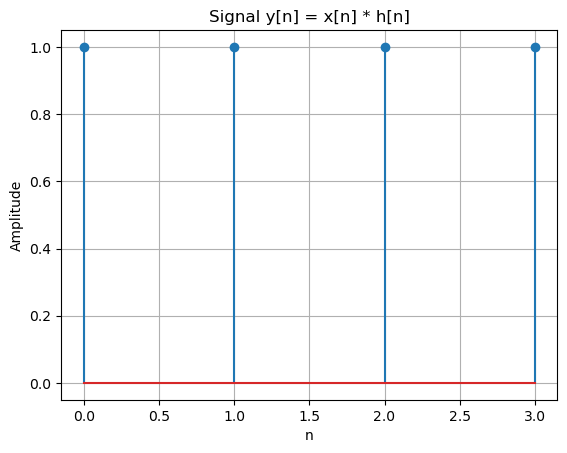

Indices : [0, 1, 2, 3]
Amplitudes : [1.0, 1.0, 1.0, 1.0]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def entrer_signal_v2(nom_signal):
    print(f"\nEntrez les indices et les amplitudes pour {nom_signal} :")
    indices = list(map(int, input("Indices (séparés par des virgules) : ").split(',')))
    amplitudes = list(map(float, input("Amplitudes (séparées par des virgules) : ").split(',')))
    signal = dict(zip(indices, amplitudes))
    print(f"Indices de {nom_signal} que vous avez saisie sont: {indices}")
    print(f"Amplitudes de {nom_signal} que vous avez saisie sont : {amplitudes}")
    return signal

def convolution(x, h):
    # Indices des signaux x et h
    x_indices = np.array(list(x.keys()))
    h_indices = np.array(list(h.keys()))
    
    # Calcul des indices de la convolution
    y_indices = range(min(x_indices) + min(h_indices), max(x_indices) + max(h_indices) + 1)
    y_amplitudes = np.zeros(len(y_indices))
    
    # Calcul de la convolution discrète
    for i, n in enumerate(y_indices):
        y_amplitudes[i] = sum(
            x.get(k, 0) * h.get(n - k, 0) for k in x_indices
        )
    
    # Retourne un dictionnaire des indices et amplitudes
    return dict(zip(y_indices, y_amplitudes))

def afficher_resultat(signal, titre):
    indices = list(signal.keys())
    amplitudes = list(signal.values())
    plt.stem(indices, amplitudes)
    plt.title(titre)
    plt.xlabel("n")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()
    
    print(f"Indices : {indices}")
    print(f"Amplitudes : {amplitudes}")

def main():
    # Entrée des signaux x[n] et h[n] avec les nouvelles méthodes
    x = entrer_signal_v2("x[n]")
    h = entrer_signal_v2("h[n]")
    
    # Convolution des deux signaux
    y = convolution(x, h)
    
    # Affichage uniquement des résultats pour y[n]
    print("\nSignal y[n] = x[n] * h[n] :")
    afficher_resultat(y, "Signal y[n] = x[n] * h[n]")

if __name__ == "__main__":
    main()


# les étapes clés du code:
**1**.Fonction ***entrer_signal_v2***:

-Cette fonction demande à l'utilisateur d'entrer les indices et les amplitudes d'un signal sous forme de listes séparées par des virgules.

-Les indices et amplitudes sont ensuite combinés en un dictionnaire, où les indices correspondent aux clés et les amplitudes aux valeurs.

**2**.Fonction ***convolution*** :

-Calcul des indices de la convolution : Les indices de x[n] et h[n] sont utilisés pour déterminer la plage des indices de la convolution y[n].

-Convolution discrète : La convolution est effectuée en calculant la somme des produits des valeurs correspondantes des signaux x[n] et h[n] , décalées par la différence d'indices. Les valeurs de y[n] sont stockées dans un dictionnaire.

**3**.Fonction ***afficher_resultat*** :

-Cette fonction prend le signal y[n] (résultat de la convolution) et l'affiche sous forme de graphique avec **plt.stem()**, qui permet de visualiser des signaux discrets en utilisant des tiges.

-Elle affiche également les indices et amplitudes du signal dans la console.

**4**.Fonction ***main*** :

-L'utilisateur entre les signaux x[n] et h[n] via la ***fonction enter_signal_v2***.

-La convolution des signaux x[n] et h[n] est effectuée avec la fonction ***convolution***.

-Le résultat y[n] de la convolution est ensuite affiché sous forme de graphique et ses indices/amplitudes sont imprimés.

**5**.Exécution :

-Le script commence dans le bloc  ***if __name__==" __main__", où la fonction main()*** est appelée.




# 2.le spectre bilatéral et unilatéral d'un signal (original et échantillonné)

=== Résolution des Spectres Bilatéraux et Unilatéraux ===


Entrez l'expression complète de x(t) (ex : x(t) = 2*cos(2*π*2000*t) + 1*cos(2*π*4000*t) + 4*cos(2*π*6000*t)) :  2*cos(2*π*2000*t) + 1*cos(2*π*4000*t) + 4*cos(2*π*6000*t)


Amplitudes et Fréquences extraites : [(2.0, 2000), (1.0, 4000), (4.0, 6000)]


Entrez la fréquence d'échantillonnage (en Hz) :  8000
Entrez la limite de fréquences à afficher (en Hz) :  20000


L'expression de  x(t) que vous avez saisie est: 2*cos(2*π*2000*t) + 1*cos(2*π*4000*t) + 4*cos(2*π*6000*t)
La valeur de fréquence d'échantillonnage que vous avez saisie  (en Hz) est:8000
 La valeur limite de fréquences que vous avez saisie (en Hz) est:20000


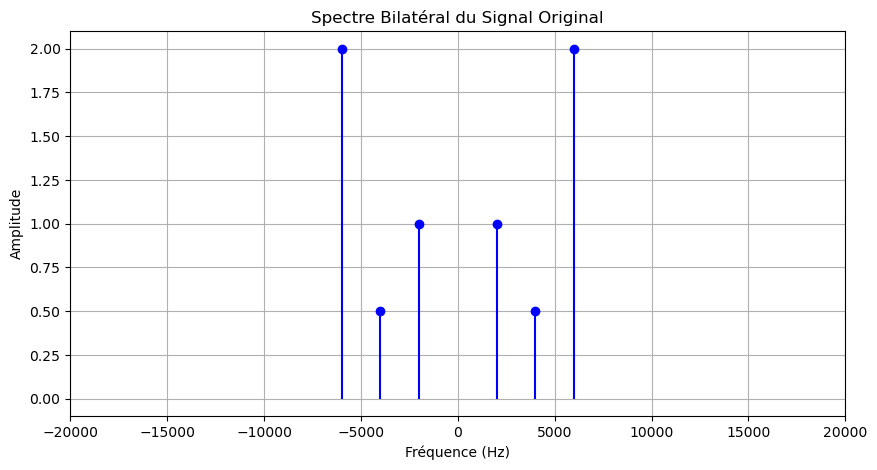

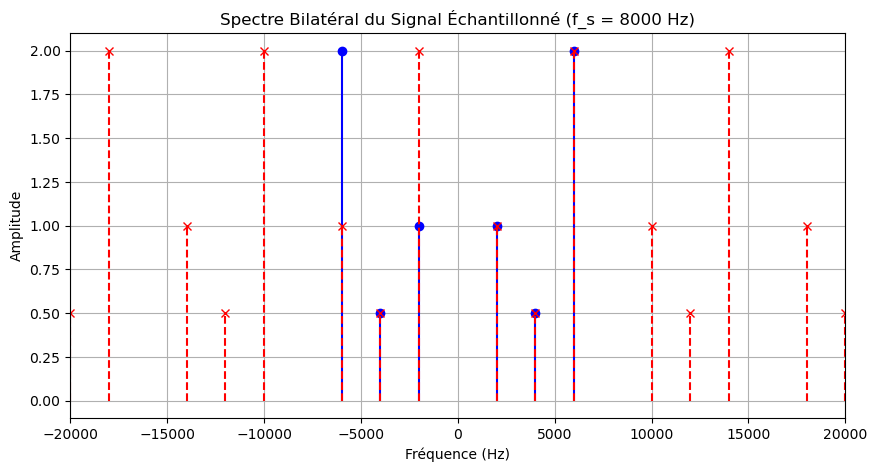

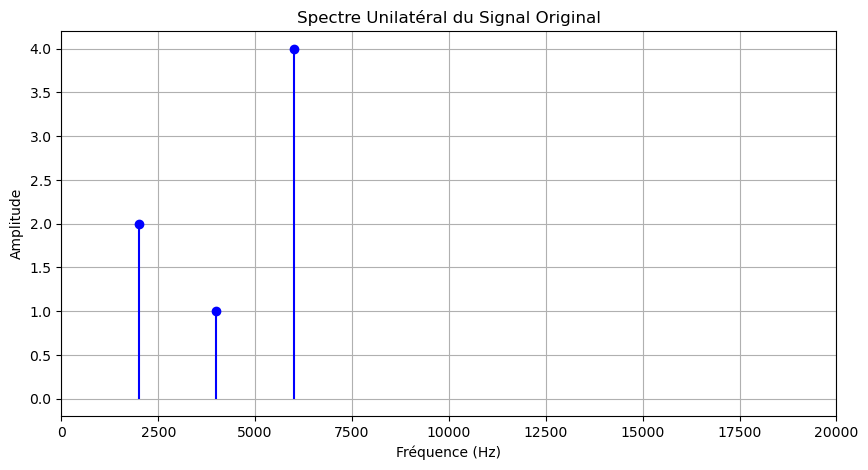

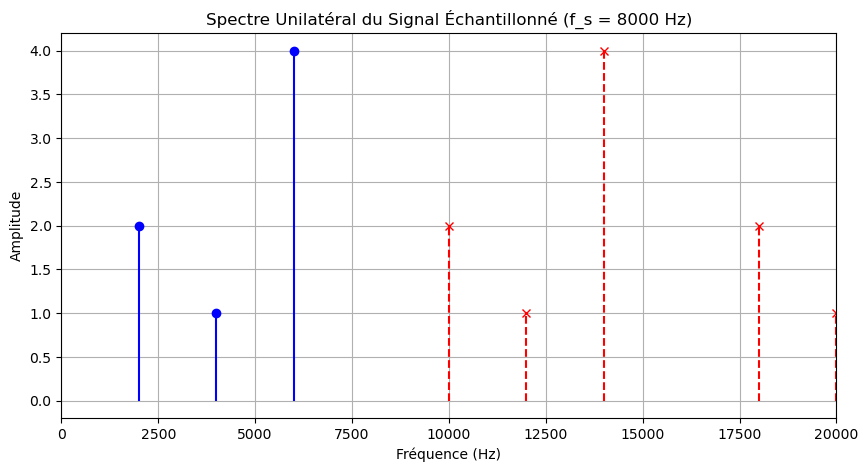

In [1]:
import matplotlib.pyplot as plt
import re

def extract_frequencies_and_amplitudes(expression):
    """
    Extrait les amplitudes et fréquences d'une expression mathématique de type x(t).
    Exemple : x(t) = 2*cos(2*π*2000*t) + 1*cos(2*π*4000*t) + 4*cos(2*π*6000*t)
    Retourne :
    - Une liste de tuples (amplitude, fréquence)
    """
    # Nouvelle expression régulière pour gérer les étoiles (*) et les espaces
    matches = re.findall(r'([0-9]*\.?[0-9]+)?\s*\*\s*cos\(\s*2\s*\*\s*π\s*\*\s*(\d+)\s*\*\s*t\s*\)', expression)
    result = []
    for amp, freq in matches:
        amplitude = float(amp) if amp else 1.0  # Amplitude par défaut = 1.0
        frequency = int(freq)
        result.append((amplitude, frequency))
    return result

def plot_signal_spectrum(frequencies_and_amplitudes, sampling_rate, frequency_limit):
    """
    Trace le spectre bilatéral et unilatéral d'un signal (original et échantillonné).
    """
    def plot_bilateral_spectrum(frequencies_and_amplitudes, title, sampling_freq=None, limit=20000):
        plt.figure(figsize=(10, 5))
        # Spectre bilatéral : division par 2 pour les amplitudes
        for amp, f in frequencies_and_amplitudes:
            plt.stem([f, -f], [amp / 2, amp / 2], linefmt='b-', markerfmt='bo', basefmt=" ")

        # Alias
        if sampling_freq:
            for amp, f in frequencies_and_amplitudes:
                for k in range(-3, 4):  # Copies autour des multiples de f_s
                    alias = f + k * sampling_freq
                    if abs(alias) <= limit:
                        plt.stem([alias], [amp / 2], linefmt='r--', markerfmt='rx', basefmt=" ")

        plt.title(title)
        plt.xlabel("Fréquence (Hz)")
        plt.ylabel("Amplitude")
        plt.xlim(-limit, limit)
        plt.grid()
        plt.show()

    def plot_unilateral_spectrum(frequencies_and_amplitudes, title, sampling_freq=None, limit=20000):
        plt.figure(figsize=(10, 5))
        # Spectre unilatéral : amplitudes originales
        for amp, f in frequencies_and_amplitudes:
            plt.stem([f], [amp], linefmt='b-', markerfmt='bo', basefmt=" ")

        # Alias
        if sampling_freq:
            for amp, f in frequencies_and_amplitudes:
                for k in range(1, 4):  # Alias uniquement positifs
                    alias = f + k * sampling_freq
                    if alias <= limit:
                        plt.stem([alias], [amp], linefmt='r--', markerfmt='rx', basefmt=" ")

        plt.title(title)
        plt.xlabel("Fréquence (Hz)")
        plt.ylabel("Amplitude")
        plt.xlim(0, limit)
        plt.grid()
        plt.show()

    # Tracé du spectre bilatéral
    plot_bilateral_spectrum(frequencies_and_amplitudes, "Spectre Bilatéral du Signal Original")
    plot_bilateral_spectrum(frequencies_and_amplitudes, 
                            f"Spectre Bilatéral du Signal Échantillonné (f_s = {sampling_rate} Hz)", 
                            sampling_rate, frequency_limit)

    # Tracé du spectre unilatéral
    plot_unilateral_spectrum(frequencies_and_amplitudes, "Spectre Unilatéral du Signal Original")
    plot_unilateral_spectrum(frequencies_and_amplitudes, 
                             f"Spectre Unilatéral du Signal Échantillonné (f_s = {sampling_rate} Hz)", 
                             sampling_rate, frequency_limit)

# Entrée de l'utilisateur
print("=== Résolution des Spectres Bilatéraux et Unilatéraux ===")
x_t = input("Entrez l'expression complète de x(t) (ex : x(t) = 2*cos(2*π*2000*t) + 1*cos(2*π*4000*t) + 4*cos(2*π*6000*t)) : ")

# Extraction des fréquences et amplitudes
frequencies_and_amplitudes = extract_frequencies_and_amplitudes(x_t)
print(f"Amplitudes et Fréquences extraites : {frequencies_and_amplitudes}")

# Entrée de la fréquence d'échantillonnage et limite des fréquences
sampling_rate = int(input("Entrez la fréquence d'échantillonnage (en Hz) : "))
frequency_limit = int(input("Entrez la limite de fréquences à afficher (en Hz) : "))
print(f"L'expression de  x(t) que vous avez saisie est: {x_t}")
print(f"La valeur de fréquence d'échantillonnage que vous avez saisie  (en Hz) est:{sampling_rate}" )
print(f" La valeur limite de fréquences que vous avez saisie (en Hz) est:{frequency_limit}" )

# Tracer les spectres
plot_signal_spectrum(frequencies_and_amplitudes, sampling_rate, frequency_limit)


# les étapes clés du code:
**1**.Fonction ***extract_frequencies_and_amplitudes***:

-Cette fonction prend une expression mathématique de type X(t), et extrait les amplitudes et fréquences des termes en cosinus.

**2**.Fonction ***plot_signal_spectrum***:

-Cette fonction génère les spectres bilatéraux et unilatéraux du signal.

-Elle trace deux types de spectres: Spectre Bilatéral et Spectre Unilatéral.

-Alias : Ces fréquences supplémentaires apparaissent en raison de l'échantillonnage. Elles sont calculées en ajoutant des multiples de la fréquence d'échantillonnage fs aux fréquences du signal original.
​

**3**.Fonctions auxiliaires ***plot_bilateral_spectrum*** et ***plot_unilateral_spectrum***.

-Ces fonctions sont responsables du tracé proprement dit des spectres bilatéraux et unilatéraux. Elles utilisent ***matplotlib*** pour afficher les graphiques.

-***plot_bilateral_spectrum*** trace à la fois les fréquences positives et négatives (d'un côté et de l'autre de l'axe des fréquences).

-***plot_unilateral_spectrum*** -plot_unilateral_spectrum.



# 3.filtre numerique ideal

=== Filtrage Passe-Bas des Spectres Bilatéraux et Unilatéraux ===


Entrez l'expression complète de x(t) (ex : x(t) = 2*cos(2*π*2000*t) + 1*cos(2*π*4000*t) + 4*cos(2*π*6000*t)) :   2*cos(2*π*2000*t) + 1*cos(2*π*4000*t) + 4*cos(2*π*6000*t)


Amplitudes et Fréquences extraites : [(2.0, 2000), (1.0, 4000), (4.0, 6000)]


Entrez la fréquence de coupure (Cutoff) pour le filtre passe-bas (en Hz) :  4500


L'expression complète de x(t) que vous avez saisie est: 2*cos(2*π*2000*t) + 1*cos(2*π*4000*t) + 4*cos(2*π*6000*t)
La fréquence de coupure (Cutoff) pour le filtre passe-bas (en Hz) que vous avez saisie est:4500


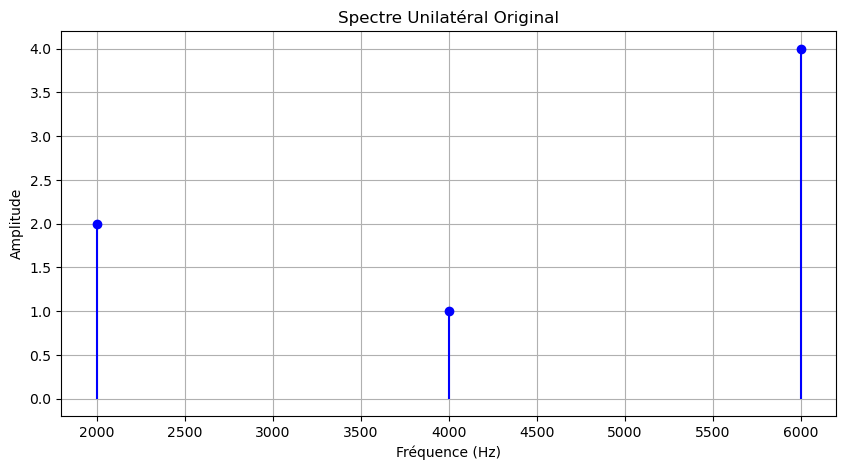

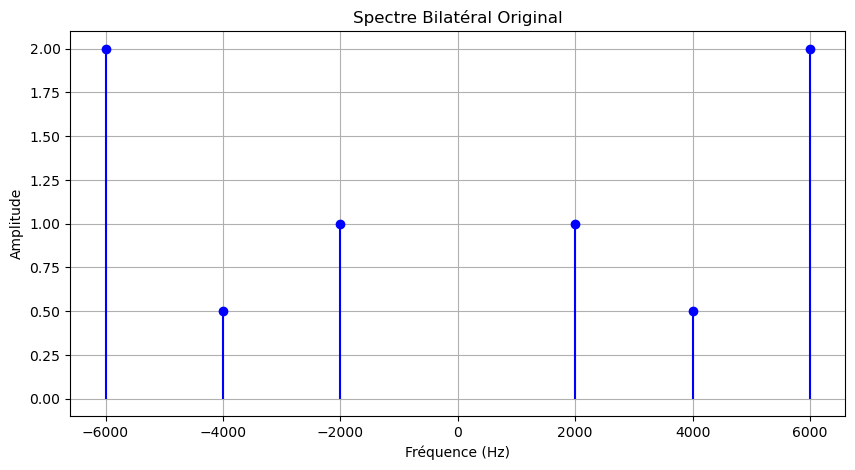

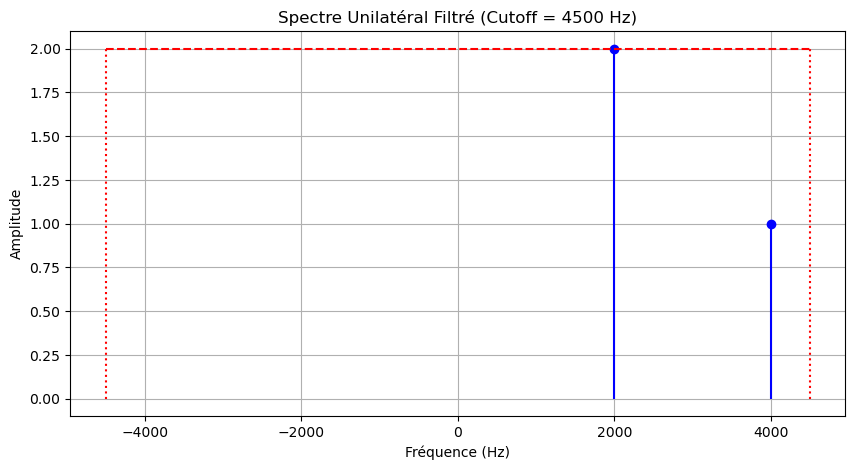

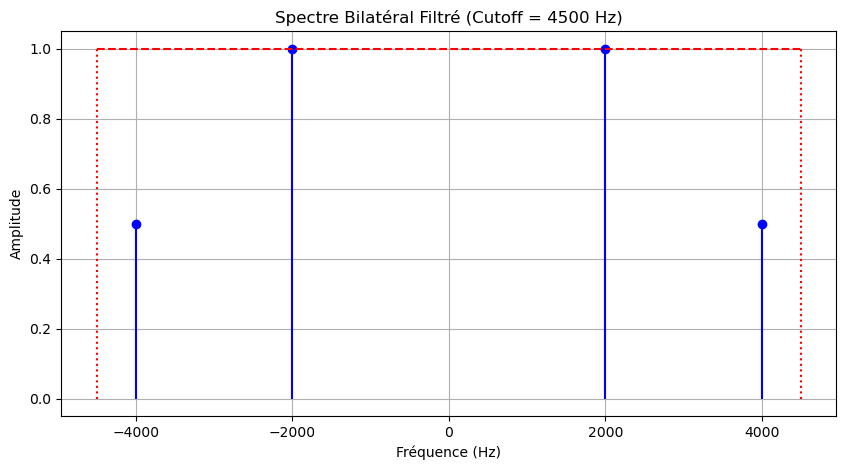

In [2]:
import matplotlib.pyplot as plt
import re

def extract_frequencies_and_amplitudes(expression):
    """
    Extrait les amplitudes et fréquences d'une expression mathématique de type x(t).
    Exemple : x(t) = 2*cos(2*π*2000*t) + cos(2*π*4000*t) + 0.5*cos(2*π*12000*t)
    """
    # Expression régulière pour détecter les amplitudes et fréquences
    matches = re.findall(r'([0-9]*\.?[0-9]+)?\s*\*\s*cos\(\s*2\s*\*\s*π\s*\*\s*(\d+)\s*\*\s*t\s*\)', expression)
    result = []
    for amp, freq in matches:
        amplitude = float(amp) if amp else 1.0  # Si pas d'amplitude, par défaut 1.0
        frequency = int(freq)
        result.append((amplitude, frequency))
    return result

def apply_lowpass_filter(frequencies_and_amplitudes, cutoff_frequency):
    """
    Applique un filtre passe-bas idéal en conservant les fréquences <= cutoff_frequency.
    """
    return [(amp, freq) for amp, freq in frequencies_and_amplitudes if abs(freq) <= cutoff_frequency]

def plot_spectrum(frequencies_and_amplitudes, title, cutoff_frequency=None, bilateral=False):
    """
    Trace le spectre bilatéral ou unilatéral avec une ligne horizontale pour le filtre passe-bas.
    """
    plt.figure(figsize=(10, 5))
    
    # Tracer les fréquences originales
    for amp, freq in frequencies_and_amplitudes:
        if bilateral:
            plt.stem([freq, -freq], [amp / 2, amp / 2], linefmt='b-', markerfmt='bo', basefmt=" ")
        else:
            plt.stem([freq], [amp], linefmt='b-', markerfmt='bo', basefmt=" ")

    # Ajouter la ligne horizontale pour le spectre filtré
    if cutoff_frequency and frequencies_and_amplitudes:
        max_amplitude = max(amp / 2 if bilateral else amp for amp, _ in frequencies_and_amplitudes)
        plt.hlines(max_amplitude, -cutoff_frequency, cutoff_frequency, colors='r', linestyles='dashed')
        plt.vlines([-cutoff_frequency, cutoff_frequency], 0, max_amplitude, colors='r', linestyles='dotted')

    plt.title(title)
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

# Entrée de l'utilisateur
print("=== Filtrage Passe-Bas des Spectres Bilatéraux et Unilatéraux ===")
x_t = input("Entrez l'expression complète de x(t) (ex : x(t) = 2*cos(2*π*2000*t) + 1*cos(2*π*4000*t) + 4*cos(2*π*6000*t)) : ")

# Extraction des fréquences et amplitudes
frequencies_and_amplitudes = extract_frequencies_and_amplitudes(x_t)
print(f"Amplitudes et Fréquences extraites : {frequencies_and_amplitudes}")

# Entrée de la fréquence de coupure
cutoff_frequency = int(input("Entrez la fréquence de coupure (Cutoff) pour le filtre passe-bas (en Hz) : "))
print(f"L'expression complète de x(t) que vous avez saisie est:{x_t}")
print(f"La fréquence de coupure (Cutoff) pour le filtre passe-bas (en Hz) que vous avez saisie est:{cutoff_frequency}")

# Spectre original
plot_spectrum(frequencies_and_amplitudes, "Spectre Unilatéral Original", bilateral=False)
plot_spectrum(frequencies_and_amplitudes, "Spectre Bilatéral Original", bilateral=True)

# Filtrage passe-bas
filtered_frequencies = apply_lowpass_filter(frequencies_and_amplitudes, cutoff_frequency)

# Spectre après filtrage avec ligne horizontale
plot_spectrum(filtered_frequencies, f"Spectre Unilatéral Filtré (Cutoff = {cutoff_frequency} Hz)", 
              cutoff_frequency=cutoff_frequency, bilateral=False)
plot_spectrum(filtered_frequencies, f"Spectre Bilatéral Filtré (Cutoff = {cutoff_frequency} Hz)", 
              cutoff_frequency=cutoff_frequency, bilateral=True)


# les étapes clés du code:
**1**.Fonction ***extract_frequencies_and_amplitudes***:

-Cette fonction prend une expression mathématique de type X(t), et extrait les amplitudes et fréquences des termes en cosinus.

-Utilise une expression régulière pour trouver les termes de la forme Acos(2*π*2000*f*t), où A est l'amplitude et f la fréquence.

-Si l'amplitude est omise, elle est supposée être 1 par défaut ( comme cos(2*π*2000*f*t) ==>A=1).

**2**.Fonction ***apply_lowpass_filter***:

-Cette fonction applique un filtre passe-bas qui conserve uniquement les fréquences inférieures ou égales à la fréquence de coupure spécifiée.

-Le filtre passe-bas supprime les fréquences au-dessus de la fréquence de coupure, en les éliminant de la liste des fréquences et amplitudes.

**3**.Fonction ***plot_spectrum***:

-Cette fonction trace le spectre du signal (bilatéral ou unilatéral) en fonction des fréquences et amplitudes extraites.

-Elle prend en entrée les fréquences et amplitudes du signal et un paramètre optionnel **bilateral** pour choisir entre un spectre bilatéral ou unilatéral.

-Si une fréquence de coupure est spécifiée, une ligne horizontale est ajoutée pour marquer la plage de fréquences filtrées (moins de fréquences que la coupure) et des lignes verticales sont ajoutées pour délimiter la fréquence de coupure.

-Le spectre bilatéral affiche les fréquences positives et négatives, tandis que le spectre unilatéral n'affiche que les fréquences positives.






# Numérical filters : FIR (Finite Impulse Filter)

=== FIR Filter Analysis ===


Enter the sampling rate (in Hz):  1000
Enter the number of filter taps (e.g., 51):  51
Enter filter type ('lowpass', 'highpass', 'bandpass', 'bandstop'):  lowpass
Enter the cutoff frequency (in Hz):  200


Filter Coefficients: [-1.24904729e-18 -1.05623580e-03 -7.69341020e-04  9.56323224e-04
  1.97608274e-03 -2.62069141e-18 -3.26538480e-03 -2.56851985e-03
  3.23463313e-03  6.51990808e-03 -6.21170236e-18 -9.82573911e-03
 -7.36568541e-03  8.88134892e-03  1.72560570e-02 -1.06504360e-17
 -2.47842717e-02 -1.84176668e-02  2.22995343e-02  4.42224439e-02
 -1.42414469e-17 -7.14698092e-02 -6.04303288e-02  9.23176270e-02
  3.02027315e-01  4.00523418e-01  3.02027315e-01  9.23176270e-02
 -6.04303288e-02 -7.14698092e-02 -1.42414469e-17  4.42224439e-02
  2.22995343e-02 -1.84176668e-02 -2.47842717e-02 -1.06504360e-17
  1.72560570e-02  8.88134892e-03 -7.36568541e-03 -9.82573911e-03
 -6.21170236e-18  6.51990808e-03  3.23463313e-03 -2.56851985e-03
 -3.26538480e-03 -2.62069141e-18  1.97608274e-03  9.56323224e-04
 -7.69341020e-04 -1.05623580e-03 -1.24904729e-18]
The sampling rate (in Hz) that you entered is:1000
The number of filter taps (e.g., 51) that you entered is:51
Filter type that you entered is:lowpas

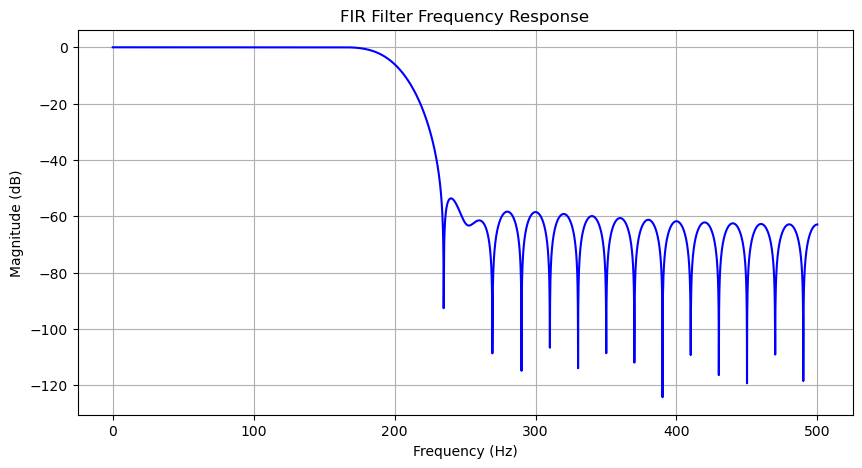

Enter frequencies of the signal components (in Hz, separated by space):  50 300
Enter amplitudes of the signal components (separated by space):  1 0.5
Enter the duration of the signal (in seconds):  2


Frequencies of the signal components (in Hz, separated by space) that you entered are:[50.0, 300.0]
amplitudes of the signal components (separated by space) that you entered are:[1.0, 0.5]
the duration of the signal (in seconds) that you entered is:2.0


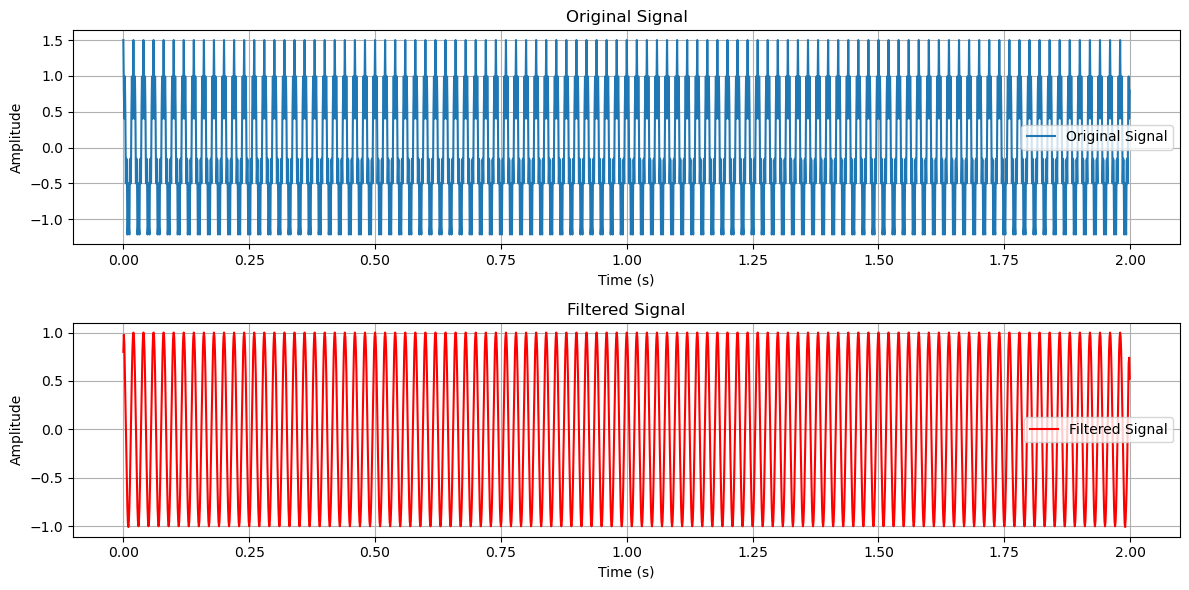

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, firwin

# 1. FIR Filter Design
def design_fir_filter(cutoff_frequencies, sampling_rate, num_taps, filter_type="lowpass"):
    """
    Designs an FIR filter using the window method.

    Parameters:
        cutoff_frequencies: list or float
            Cutoff frequency/frequencies of the filter in Hz.
        sampling_rate: int
            Sampling frequency in Hz.
        num_taps: int
            Number of filter coefficients.
        filter_type: str
            Type of filter ('lowpass', 'highpass', 'bandpass', 'bandstop').

    Returns:
        coefficients: ndarray
            FIR filter coefficients.
    """
    normalized_cutoff = np.array(cutoff_frequencies) / (sampling_rate / 2)
    coefficients = firwin(num_taps, normalized_cutoff, pass_zero=filter_type)
    return coefficients

# 2. Filter Frequency Response
def plot_frequency_response(coefficients, sampling_rate):
    """Plots the frequency response of the FIR filter."""
    w, h = freqz(coefficients, worN=8000)
    frequencies = (w / (2 * np.pi)) * sampling_rate
    plt.figure(figsize=(10, 5))
    plt.plot(frequencies, 20 * np.log10(abs(h)), 'b')
    plt.title("FIR Filter Frequency Response")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.show()

# 3. Signal Generation and Filtering
def generate_signal(frequencies, amplitudes, duration, sampling_rate):
    """Generates a signal composed of multiple sinusoids."""
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    signal = np.zeros_like(t)
    for freq, amp in zip(frequencies, amplitudes):
        signal += amp * np.cos(2 * np.pi * freq * t)
    return t, signal

def apply_fir_filter(signal, coefficients):
    """Applies the FIR filter to a signal using convolution."""
    return np.convolve(signal, coefficients, mode='same')

# 4. Main Program
if __name__ == "__main__":
    print("=== FIR Filter Analysis ===")

    # User Inputs
    sampling_rate = int(input("Enter the sampling rate (in Hz): "))
    num_taps = int(input("Enter the number of filter taps (e.g., 51): "))
    filter_type = input("Enter filter type ('lowpass', 'highpass', 'bandpass', 'bandstop'): ").strip()
    if filter_type in ["bandpass", "bandstop"]:
        cutoff_frequencies = list(map(float, input("Enter cutoff frequencies separated by space (e.g., 100 300): ").split()))
    else:
        cutoff_frequencies = float(input("Enter the cutoff frequency (in Hz): "))

    # FIR Filter Design
    coefficients = design_fir_filter(cutoff_frequencies, sampling_rate, num_taps, filter_type)
    print("Filter Coefficients:", coefficients)
    print(f"The sampling rate (in Hz) that you entered is:{ sampling_rate}")
    print(f"The number of filter taps (e.g., 51) that you entered is:{ num_taps}")
    print(f"Filter type that you entered is:{filter_type}")
    print(f"Cutoff frequencies that you entered is:{cutoff_frequencies}")

    # Frequency Response
    plot_frequency_response(coefficients, sampling_rate)

    # Signal Generation
    signal_frequencies = list(map(float, input("Enter frequencies of the signal components (in Hz, separated by space): ").split()))
    signal_amplitudes = list(map(float, input("Enter amplitudes of the signal components (separated by space): ").split()))
    duration = float(input("Enter the duration of the signal (in seconds): "))

    t, signal = generate_signal(signal_frequencies, signal_amplitudes, duration, sampling_rate)

    # Apply FIR Filter
    filtered_signal = apply_fir_filter(signal, coefficients)
    print(f"Frequencies of the signal components (in Hz, separated by space) that you entered are:{ signal_frequencies}")
    print(f"amplitudes of the signal components (separated by space) that you entered are:{signal_amplitudes}")
    print(f"the duration of the signal (in seconds) that you entered is:{ duration}")


    # Plot Results
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal, label="Original Signal")
    plt.title("Original Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t, filtered_signal, label="Filtered Signal", color='r')
    plt.title("Filtered Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

# les étapes clés du code:
**1**. Conception du Filtre FIR (***design _fir_filter***):

**-** Cette fonction utilise la méthode de fenêtre pour concevoir un filtre FIR. Elle prend en entrée:

**.** Fréquences de coupure : Une ou plusieurs fréquences de coupure en Hz.

**.** Fréquence d'échantillonnage : La fréquence d'échantillonnage en Hz.

**.** Nombre de taps : Le nombre de coefficients du filtre (détermine la "longueur" du filtre).

**.** Type de filtre : Le type de filtre (pass-bas, pass-haut, passe-bande, ou coupe-bande).

**-** Elle normalise les fréquences de coupure et utilise la fonction ***firwin*** de ***scipy.signal*** pour générer les coefficients du filtre.

**2**.Réponse en Fréquence du Filtre (***plot_frequency_response***):

**-** Cette fonction trace la réponse en fréquence du filtre FIR conçu en utilisant les coefficients générés par la fonction précédente.

**-** Elle utilise la fonction ***freqz*** de ***scipy.signal***pour calculer la réponse en fréquence du filtre.

**-** Le graphique affiche la magnitude de la réponse du filtre en fonction de la fréquence, en décibels (dB).

**3**.Génération du Signal et Application du Filtre:

**-** Génération du Signal ( ***generate_signal***):Cette fonction génère un signal composé de plusieurs sinusoïdes (ondes cosinus) avec des fréquences et amplitudes spécifiées par l'utilisateur.

**.** Elle génère un vecteur temporel ***t*** et un signal qui est la somme des différentes sinusoïdes.

**-** Application du Filtre FIR( ***apply_fir_filter***):Applique le filtre FIR conçu au signal généré en utilisant la convolution (***np.convolve***).

**.** Le signal filtré est renvoyé par la fonction.

**4**.Exécution Principale du Programme (***if__name__=="__main__"***):

-Le programme commence par demander à l'utilisateur les paramètres nécessaires pour concevoir le filtre FIR, comme la fréquence d'échantillonnage, le type de filtre, et les fréquences de coupure.

**-** Il crée le filtre FIR en utilisant la fonction ***design _fir_filter***.

**-** Le programme trace la réponse en fréquence du filtre.

**-** L'utilisateur entre les composants du signal (fréquences et amplitudes) et la durée du signal.

**-** Le signal est généré en utilisant la fonction ***genarete_signal***.

**-** le filtre FIR est appliqué au signal à l'aide de la fonction ***apply_fir_filter***, et les graphes des signaux originaux et filtrés sont affichés pour comparaison.





   


# Numérical filters : IIR (Finite Impulse Filter)

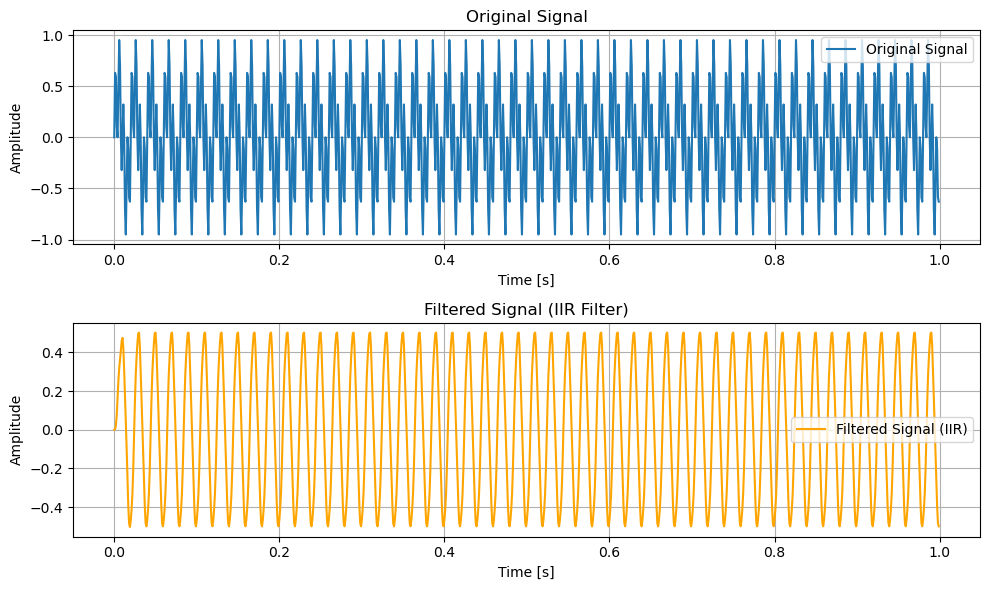

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Step 1: Define the IIR filter design (using Butterworth filter)
def iir_filter_design(cutoff_frequency, fs, filter_order=4, filter_type='low'):
    # Calculate the normalized cutoff frequency
    nyquist = fs / 2.0
    normalized_cutoff = cutoff_frequency / nyquist
    
    # Design the IIR filter (Butterworth)
    b, a = butter(filter_order, normalized_cutoff, btype=filter_type, analog=False)
    
    return b, a

# Step 2: Apply the IIR filter to the signal
def apply_iir_filter(signal, b, a):
    return lfilter(b, a, signal)

# Step 3: Generate a sample signal for testing
def generate_sample_signal(fs, duration, freq1, freq2):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    signal = 0.5 * np.sin(2 * np.pi * freq1 * t) + 0.5 * np.sin(2 * np.pi * freq2 * t)
    return t, signal

# Step 4: Plotting the results
def plot_signals(t, original_signal, filtered_signal):
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, original_signal, label='Original Signal')
    plt.title('Original Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(t, filtered_signal, label='Filtered Signal (IIR)', color='orange')
    plt.title('Filtered Signal (IIR Filter)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Main code execution
if __name__ == "__main__":
    # Parameters
    fs = 1000  # Sampling frequency in Hz
    duration = 1.0  # Signal duration in seconds
    freq1 = 50  # Frequency of first signal component in Hz
    freq2 = 200  # Frequency of second signal component in Hz
    cutoff_frequency = 100  # Cutoff frequency of the filter in Hz
    filter_order = 4  # Order of the filter
    filter_type = 'low'  # Type of filter ('low' for low-pass, 'high' for high-pass)

    # Generate the sample signal
    t, original_signal = generate_sample_signal(fs, duration, freq1, freq2)

    # Design the IIR filter
    b, a = iir_filter_design(cutoff_frequency, fs, filter_order, filter_type)

    # Apply the IIR filter to the signal
    filtered_signal = apply_iir_filter(original_signal, b, a)

    # Plot the results
    plot_signals(t, original_signal, filtered_signal)


# les étapes clés du code:
**1**.Conception du Filtre IIR (Butterworth)(***iir_filter_design***):

**-** La fonction ***iir_filter_design***conçoit un filtre IIR de type Butterworth (un type de filtre qui a une réponse en fréquence plate dans la bande passante):

**.** Fréquence de coupure : La fréquence à laquelle le filtre commence à atténuer le signal.

**.** Fréquence d'échantillonnage (fs) : La fréquence à laquelle le signal est échantillonné.

**.** Ordre du filtre : Le degré du filtre, qui détermine la pente de l'atténuation. Un ordre plus élevé signifie une atténuation plus rapide au-delà de la fréquence de coupure.

**.** Type de filtre : Détermine si le filtre est passe-bas(***low***), passe-haut(***high***), passe-bande(***bandpass***), ou coupe-bande(***bandtop***).

**-** La fonction calcule la fréquence de coupure normalisée en divisant la fréquence de coupure par la fréquence de Nyquist (la moitié de la fréquence d'échantillonnage).

**-** Elle utilise ensuite la fonction ***butter*** de ***scipy.signal*** pour concevoir les coefficients du filtre, qui sont retournés sous la forme de deux tableaux(***b*** et ***a***), représentant respectivement les coefficients du numérateur et du dénominateur de la fonction de transfert du filtre.

**2** .Application du Filtre IIR au Signal (***apply_iir_filter***):

**-** La fonction ***apply_iir filter*** applique le filtre IIR à un signal donné en utilisant la fonction ***lfilter*** de ***scipy.signal***.

**-** Elle prend en entrée le signal et les coefficients du filtre (***b***,***a***) et retourne le signal filtré.

**3**.Génération d'un Signal d'Essai (***generate_sample_signal***):

**-** La fonction ***ganarate_sample_signal*** génère un signal composé de deux sinusoïdes de fréquences différentes (par exemple 50 Hz et 200 Hz).

**-** Le signal est une combinaison de deux ondes sinusoïdales de différentes fréquences, et est généré sur une période spécifiée (1 seconde par défaut).

**4**.Affichage des Résultats (***plot_signals***):

**-** La fonction ***plot_signals*** race les signaux originaux et filtrés sur des graphiques.

**-** Deux sous-graphiques sont créés:

**.** Signal original : Montre le signal avant application du filtre.

**.** Signal filtré : Montre le signal après l'application du filtre IIR, qui a atténué les composantes de fréquence au-delà de la fréquence de coupure.

**5** .Exécution Principale du Programme ( ***if__name__=="__main__"***):

**-** Le programme commence par définir des paramètres tels que la fréquence d'échantillonnage (***fs***), la durée du signal, les fréquences des composants du signal, la fréquence de coupure du filtre et l'ordre du filtre.

**-** Le signal d'essai est généré avec la fonction ***generate_sample_signal***.

**-** Le filtre IIR est conçu en utilisant ***iir_filter_design***avec les paramètres spécifiés.

**-** Le filtre est appliqué au signal avec ***apply_iir_filter***.

**-** Les résultats sont affichés à l'aide de ***plot_signals***, montrant le signal original et le signal filtré.
  